<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"> · Minería de datos · PRAC 1</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRAC 1: Selección y preparación de un juego de datos

Autor: Ángel Bujalance Gómez

En esta práctica he seleccionado una base de datos del repositorio: UCI Machine Learning (https://archive.ics.uci.edu/ml/datasets/heart+disease). El juego de datos que he seleccionado permite generar un modelo capaz de pronosticar el diagnóstico de enfermedades del corazón. En esta primera fase voy a tratar de preparar los datos para la fase del entrenamiento del modelo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', message='', category=FutureWarning, module='', lineno=0, append=False)

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.shape

(920, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Estas dos últimas funciones proporcionan información general del dataset. Podemos ver que hay 920 observaciones y 16 variables distintas.

De estas, 8 son varaibles numericas, de las que 5 son variables con valores contínuos. Las 8 variables restantes son variables categóricas.

Podemos ver que algunas de estas variables tienen muchos atributos con valores nulos. Por ejemplo, la variable "ca" tiene 309 de 920 observaciones. 

Para más información sobre la base de datos, en la página de UCI ML tenemos la siguiente información:

* ID: Identificador único para cada paciente.
* Age: Edad en años.
* Origin: Lugar del estudio.
* Sex: sexo.
* cp: Síntoma correspondiente al tipo de dolor.
* trestbps: Presión sanguinea en reposo.
* chol: colesterol.
* fbs: si nivel de azúcar en ayunas > 120 mg/dl
* restecg: ECG resultados
* thalach: máximo nivel cardíaco conseguido
* exang: angina producida por ejercicio (Sí/No)
* oldpeak: depresión de ST por ejercicio
* slope: la pendiente de ST provocada por el ejercicio
* ca: número de vasos mayores (0-3)
* thal: tres valores: normal; fixed defect; reversible defect
* num: diagnóstico

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Además, la variable "dataset" contiene información sobre el las instituciones que han colaborado en hacer este dataset. Esta variable no aporta información relevante sobre el diagnóstico de la enfermedad. Por lo tanto, será eliminada.

In [6]:
df = df.drop(columns=['dataset'])

In [7]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


La variable "num" es la variable que queremos predecir. 0 significa que la persona no tenía la enfermedad y valores más altos corresponden a diferentes etapas de la enfermedad.

De esta manera, he creado dos variables: una que corresponda al diagnóstico que indica si la persona está enferma o no. Y otra  que contenga el detalle de la etapa en la que se encuentra el paciente.

In [8]:
df = df.rename(columns={'num': 'stage'})
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
df['diagnosis'] = df['stage']
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [10]:
df['diagnosis'].loc[(df['diagnosis'] > 0)] = 1
df.head()

c:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


Voy a eliminar las variables 'ca' y 'thal' puesto que tienen demasiados valores nulos. Alrededor del 50% de los valores son nulos en esta variable.

In [11]:
df = df.drop(columns=['ca', 'thal', 'id'])

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,stage,diagnosis
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,0


Voy a visualizar todas aquellas variables que contienen valores nulos:

In [13]:
df.isna().sum()[df.isna().sum() > 0] # show nan of cols with nan

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
dtype: int64

In [14]:
set(df.slope)

{'downsloping', 'flat', nan, 'upsloping'}

Primero de todo, voy a dividir los datos de manera que tenga un dataset de entrenamiento y otro de test para evaluar la capacidad del modelo. 

Para hacer la limpieza de los datos, voy a crear una serie de reglas en el dataset de entrenamiento. Estas reglas las aplicaré también en el dataset de test. En una situación real en la que tengamos missing data en la fase de entrenamiento, también la tendremos una vez el modelo haya sido desarrollado e implmentado a nivel de producción. Es por eso que hacer esta división de los datos va a favorecer tener una visión más real del rendimiento que el modelo va a tener en producción.

### Train - Test Split

In [15]:
X = df.drop(columns=['diagnosis', 'stage'])
y = df.diagnosis

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)

## Data Cleaning

First, I will clean the attributes in the train dataset. The same principles followed here, will be implemented to clean the data in the test set.

In [17]:
X_train = X
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping


In [18]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
dtype: int64

### Data Cleaning trestbps & Data Exploration

<AxesSubplot:>

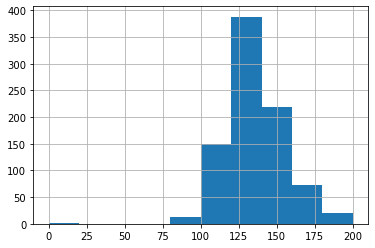

In [19]:
X_train.trestbps.hist()

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

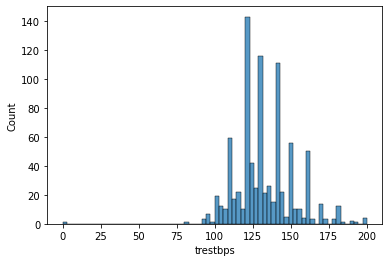

In [20]:
sns.histplot(X_train, x='trestbps', bins=70)

En este histograma se puede observar cómo los datos siguen una distribución normal, pero hay algunos valores más frecuentes. Esto puede ser porque algunos médicos tengan tendencia a asignar valores redondeados. 

En este caso, asumimos que la distribución es normal y asignaremos el valor medio a los valores nulos.

In [21]:
trestbps = X_train['trestbps'][X_train['trestbps'].notnull()].to_numpy().reshape(-1,1)

trestbps_mean = np.mean(trestbps)
print(trestbps_mean)

X_train['trestbps'] = X_train['trestbps'].fillna(trestbps_mean)

132.13240418118468


<AxesSubplot:xlabel='trestbps', ylabel='Count'>

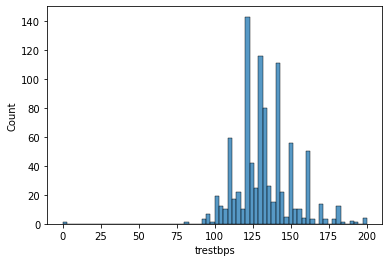

In [22]:
sns.histplot(X_train, x='trestbps', bins=70)

<AxesSubplot:>

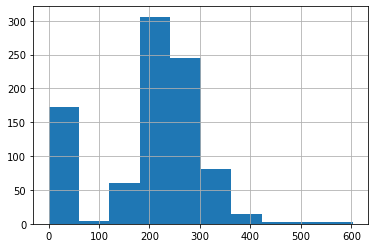

In [23]:
X_train.chol.hist()

### Data Cleaning Cholesterol & Data Exploration

<AxesSubplot:xlabel='chol', ylabel='Count'>

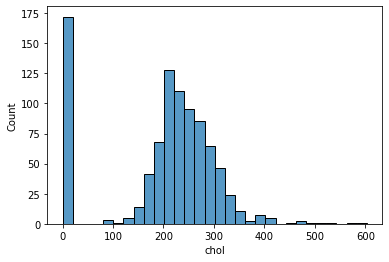

In [24]:
sns.histplot(X_train, x='chol', bins=30)

In [25]:
X_train.chol.head()

0    233.0
1    286.0
2    229.0
3    250.0
4    204.0
Name: chol, dtype: float64

En este caso, podemos categorizar los valores numéricos y discretizar esta variable en función del nivel de colesterol. Según criterios médicos, valores por debajo de 200 son niveles de colesterol adecuados para mantener una buena salud cardiovascular. Valores entre 200 y 239 son considerados de riesgo y de 240 o mayores son peligrosos.

En esta variable vuelven a ver missing values. Estos los substiuiré por la mediana. En este caso, aunque la mayor parte de los datos siguen una distribución normal, una parte de ellos están en otro "clúster". Es por eso por lo que en este caso no puedo asumir que los datos sean normales y prefiero substituir los valores por la mediana.

REFERENCES:

Cholesterol Numbers and What They Mean (https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)

In [26]:
chol = X_train['chol'][X_train['chol'].notnull()].to_numpy().reshape(-1,1)

chol_median = np.median(chol)

print(chol_median)

X_train['chol'] = X_train['chol'].fillna(chol_median)

223.0


<AxesSubplot:xlabel='chol', ylabel='Count'>

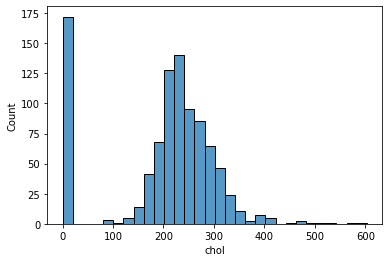

In [27]:
sns.histplot(X_train, x='chol', bins=30)

In [28]:
X_train.insert(4, "chol_cat", X_train['chol'])
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,Male,typical angina,145.0,233.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping
1,67,Male,asymptomatic,160.0,286.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat
2,67,Male,asymptomatic,120.0,229.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat
3,37,Male,non-anginal,130.0,250.0,250.0,False,normal,187.0,False,3.5,downsloping
4,41,Female,atypical angina,130.0,204.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping


In [29]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,Male,typical angina,145.0,233.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping
1,67,Male,asymptomatic,160.0,286.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat
2,67,Male,asymptomatic,120.0,229.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat
3,37,Male,non-anginal,130.0,250.0,250.0,False,normal,187.0,False,3.5,downsloping
4,41,Female,atypical angina,130.0,204.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping


In [30]:
X_train['chol_cat'].loc[(X_train['chol'] < 240)] = 'risk'
X_train['chol_cat'].loc[(X_train['chol'] >= 240)] = 'danger'
X_train['chol_cat'].loc[(X_train['chol'] < 200)] = 'healthy'

c:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
X_train.iloc[5:12]

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
5,56,Male,atypical angina,120.0,risk,236.0,False,normal,178.0,False,0.8,upsloping
6,62,Female,asymptomatic,140.0,danger,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping
7,57,Female,asymptomatic,120.0,danger,354.0,False,normal,163.0,True,0.6,upsloping
8,63,Male,asymptomatic,130.0,danger,254.0,False,lv hypertrophy,147.0,False,1.4,flat
9,53,Male,asymptomatic,140.0,risk,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping
10,57,Male,asymptomatic,140.0,healthy,192.0,False,normal,148.0,False,0.4,flat
11,56,Female,atypical angina,140.0,danger,294.0,False,lv hypertrophy,153.0,False,1.3,flat


### Data Cleaning fbs & Data Exploration (I)

<AxesSubplot:xlabel='fbs', ylabel='Count'>

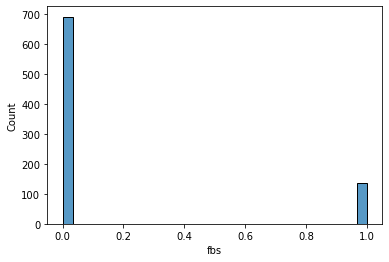

In [32]:
sns.histplot(X_train, x='fbs', bins=30)

En este caso se trata de un ejemplo de variable binaria. Para asignar los missing values, podríamos elaborar diferentes estrategias. Por ejemplo, podríamos asignar las instancias con valores perdidos a la categoría más frecuente. Otra alternativa es generar un modelo con el resto de valores y predecir los valores nulos. En este caso, voy a usar esta estrategia. Primero, voy a limpiar y asegurarme que no hay valores nulos en el resto de variables y después continuaré con la limpieza de esta variable.

En este caso, sólo quiero mostrar que se pueden utilizar modelos de Machine Learning durante la fase de limpieza de datos para predecir los valores nulos, pero no voy a centrarme en los aspectos formales de los modelos para mejorar su rendimiento.

### Data Cleaning restecg & Data Exploration

<AxesSubplot:xlabel='restecg', ylabel='Count'>

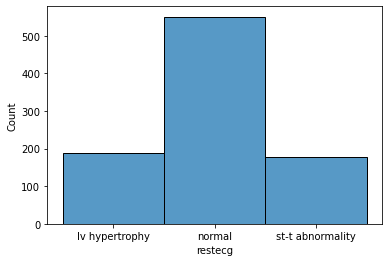

In [33]:
sns.histplot(X_train, x='restecg', bins=30)

En este caso, al haber un único valor nulo, voy a asignarlo a la categoría mayoritaria.

In [34]:
print(set(X_train.restecg))

X_train['restecg'] = X_train['restecg'].fillna('normal')

{nan, 'st-t abnormality', 'lv hypertrophy', 'normal'}


### Data Cleaning thalch & Data Exploration

<AxesSubplot:xlabel='thalch', ylabel='Count'>

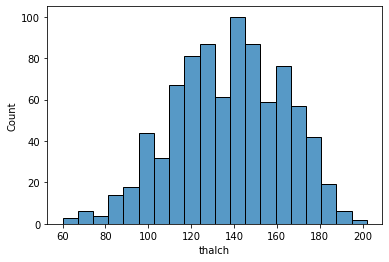

In [35]:
sns.histplot(X_train, x='thalch', bins=20)

De nuevo tenemos una variable numérica que sigue una distribución normal, en este caso voy a substituir los valores nulos por el valor medio.

In [36]:
thalch_mean = np.mean(X_train.thalch)
print(thalch_mean)

X_train['thalch'] = X_train['thalch'].fillna(thalch_mean)

137.5456647398844


### Data Cleaning exang & Data Exploration

<AxesSubplot:xlabel='exang', ylabel='Count'>

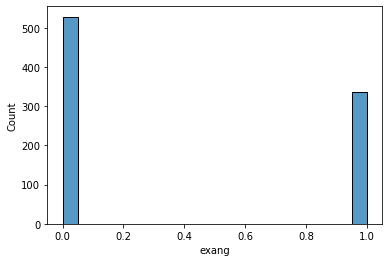

In [37]:
sns.histplot(X_train, x='exang', bins=20)

En este caso, voy a volver a utilizar el valor más frecuente para rellenar los NaN values.

In [38]:
print(set(X_train['exang']))
X_train['exang'] = X_train['exang'].fillna('False')

{False, True, nan}


### Data Cleaning oldpeak & Data Exploration

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

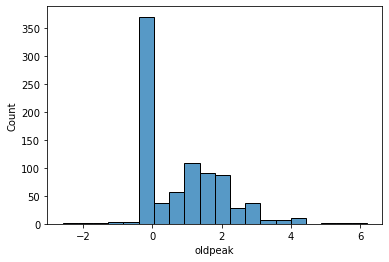

In [39]:
sns.histplot(X_train, x='oldpeak', bins=20)

De nuevo tenemos una variable numérica que no sigue distribución normal, en este caso voy a substituir los valores nulos por la mediana.

In [40]:
oldpeak = X_train['oldpeak'][X_train['oldpeak'].notnull()].to_numpy().reshape(-1,1)

oldpeak_median = np.median(oldpeak)
print(oldpeak_median)

X_train['oldpeak'] = X_train['oldpeak'].fillna(oldpeak_median)

0.5


### Data Cleaning slope & Data Exploration

<AxesSubplot:xlabel='slope', ylabel='Count'>

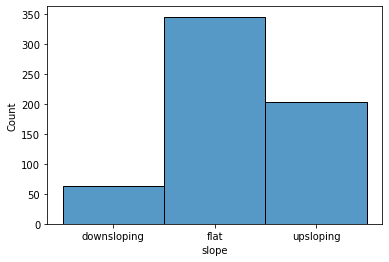

In [41]:
sns.histplot(X_train, x='slope', bins=20)

En este caso, al tratarse de muchos valores nulos, podemos simplemente eliminar este atributo. He decidido hacer esto porque utilizar otro método podía introducir mucho ruido en esta variable.

In [42]:
X_train = X_train.drop(columns=['slope'])

### Data Cleaning fbs & Data Exploration (II)

In [43]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

fbs    90
dtype: int64

In [44]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,risk,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,danger,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,risk,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,danger,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,risk,204.0,False,lv hypertrophy,172.0,False,1.4


Antes de esto vamos a tener que transformar los datos categoricos en variables dummies y normalizar los datos numéricos.

### Transformación de los datos

In [45]:
X_train_cat = X_train[['cp', 'sex', 'chol_cat', 'restecg', 'exang']]
X_train_cat.head()

,cp,sex,chol_cat,restecg,exang
0,typical angina,Male,risk,lv hypertrophy,False
1,asymptomatic,Male,danger,lv hypertrophy,True
2,asymptomatic,Male,risk,lv hypertrophy,True
3,non-anginal,Male,danger,normal,False
4,atypical angina,Female,risk,lv hypertrophy,False


In [46]:
X_train_num = X_train[['age', 'trestbps', 'thalch', 'oldpeak']]
X_train_num.head()

,age,trestbps,thalch,oldpeak
0,63,145.0,150.0,2.3
1,67,160.0,108.0,1.5
2,67,120.0,129.0,2.6
3,37,130.0,187.0,3.5
4,41,130.0,172.0,1.4


In [47]:
X_train_cat_dum = pd.get_dummies(X_train_cat)
X_train_cat_dum.head()

,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0


In [48]:
# para normalizar los datos, puedo usar la siguiene función:

def norm_df(df: pd.DataFrame()):
    brain_norm = (df - df.mean())/df.std()
    return brain_norm

In [49]:
X_train_num_norm = norm_df(X_train_num)
X_train_num_norm.head()

,age,trestbps,thalch,oldpeak
0,1.006838,0.697662,0.495429,1.367365
1,1.431255,1.510939,-1.175316,0.611256
2,1.431255,-0.657801,-0.339943,1.650906
3,-1.751875,-0.115616,1.967275,2.501529
4,-1.327458,-0.115616,1.370581,0.516743


In [50]:
# junto de nuevo los datos categóricos y cuantitativos

X_train_cl = pd.merge(X_train_num_norm, X_train_cat_dum, left_index=True, right_index=True)
X_train_cl.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0


In [51]:
X_train_cl_fbs = pd.merge(X_train_cl, X_train['fbs'], left_index=True, right_index=True)
X_train_cl_fbs.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,fbs
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,True
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,False
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,False
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,False
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,False


In [52]:
X_train_cl_fbs.shape

(920, 20)

Ahora voy a dividir los datos en un test en el que están los valores nulos que vamos a intentar predecir y el resto de datos que nos servirán para predecir estos valores

In [53]:
X_pred_fbs = X_train_cl_fbs[X_train_cl_fbs['fbs'].isna()].iloc[:,:-1]
print(X_pred_fbs.shape)
X_pred_fbs.head()

(90, 19)


,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
330,-1.645771,-0.657801,-0.339943,-0.806448,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
384,-0.796936,0.968754,-0.857079,-0.806448,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
410,-0.478623,-0.657801,-0.220604,0.138688,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
434,-0.054205,-1.037330,-0.419503,-0.806448,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
447,0.051899,0.426569,0.097633,-0.806448,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0


In [54]:
X_train_fbs = X_train_cl_fbs.dropna()
print(X_train_fbs.shape)
X_train_fbs.head()

(830, 20)


,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,fbs
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,True
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,False
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,False
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,False
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,False


In [55]:
set(X_train_fbs)

{'age',
 'chol_cat_danger',
 'chol_cat_healthy',
 'chol_cat_risk',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'exang_False',
 'exang_True',
 'fbs',
 'oldpeak',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'sex_Female',
 'sex_Male',
 'thalch',
 'trestbps'}

En este caso, voy a validar con un test muy pequeño. No quiero hacer el dataset de train excesivamente pequeño porque ya es la segunda partición de los datos y corro el riesgo de usar un dataset de entrenamiento excesivamente pequeño.

In [56]:
X = X_train_fbs.drop(columns=['fbs'])
yy = X_train_fbs.fbs
yy = yy.astype('int') 

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, yy, test_size=0.1, random_state=23)

In [57]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train2, y_train2)

In [58]:
y_pred = clf.predict(X_test2)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train2, y_train2, cv=5)

confusion_matrix(y_train2, y_train_pred)

array([[610,   7],
       [123,   7]], dtype=int64)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_train2, y_train_pred).ravel()

prec = tp/(tp + fp)

print(f"La precisión del modelo es de {prec}")

La precisión del modelo es de 0.5


Podemos ver que la precisión de este modelo es bastante baja. Los datos que estamos usando no están hechos para predecir la variable fbs. Por lo tanto, es previsible que estos resultados no sean especialmente buenos. 

Además, en este ejemplo quería mostrar cómo se pueden usar métodos más sofisticados para predecir el valor real de los valores nulos.

A continuación voy a predecir los valores nulos usando este modelo:

In [61]:
fbs_null = clf.predict(X_pred_fbs)

In [62]:
fbs_null

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Ahora juntamos al dataset el array con los resultados predichos por el modelo. Excepto el primer valor nulo, el resto son False. Una vez tega esto, ya tendremos los datos perfectos para seguir en las próximas fases con la implementación de los modelos de Machine Learning.

Aún así, voy a reducir el número de dimensiones usando PCA o Singular Value Decomposition (SVD).

In [63]:
X_train_cl.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0


In [64]:
X_train.loc[680, 'fbs'] = True

In [65]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

fbs    89
dtype: int64

In [66]:
X_train['fbs'] = X_train['fbs'].fillna(False)

In [67]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

Series([], dtype: int64)

In [68]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,risk,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,danger,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,risk,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,danger,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,risk,204.0,False,lv hypertrophy,172.0,False,1.4


In [69]:
set(X_train['fbs'])

{False, True}

In [70]:
#convertir fbs en una variable dummy
fbs_dum = pd.get_dummies(X_train['fbs'])

fbs_dum.head()

,False,True
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [71]:
X_tr = pd.concat([X_train_cl, fbs_dum], axis=1)
X_tr.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,...,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,False,True
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


### Aplicar PCA a los datos

Una vez he completado la etapa de limpieza de datos, puedo empezar a aplicar la PCA a la base de datos que he obtenido al final de todo el proceso.

Usando Singular Value Decomposition (SVD) podemos descomponer los datos en la operación de tres matrices distintas, donde cada vector de la matrix Vt corresponde a un componente principal. De manera que los primeros componentes son los que contienen más porcentaje de varianza explicada de los datos principales y los últimos los que menos. Es decir, los vectores de la matriz Vt están ordenados en función del orden de la varianza.

Primero vamos a obtener una matriz de correlaciones de los datos numéricos:

In [72]:
X_tr_num = X_tr.iloc[:,:4]
X_tr_num.head()

,age,trestbps,thalch,oldpeak
0,1.006838,0.697662,0.495429,1.367365
1,1.431255,1.510939,-1.175316,0.611256
2,1.431255,-0.657801,-0.339943,1.650906
3,-1.751875,-0.115616,1.967275,2.501529
4,-1.327458,-0.115616,1.370581,0.516743


In [73]:
X_tr_corr = X_tr_num.corr()

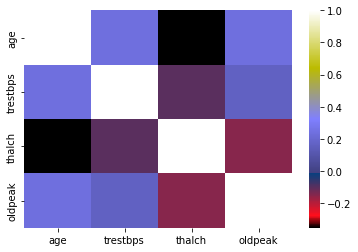

In [74]:
sns.heatmap(X_tr_corr, cmap="gist_stern")
plt.show()

In [75]:
U, s, Vt = np.linalg.svd(X_tr_corr) # svd

pc1 = Vt.T[:, 0] # primer componente de la PCA
pc1[:10]

array([-0.60384652, -0.42011922,  0.50948299, -0.44642615])

Una vez tenemos los componentes, podemos calcular la variabilidad que cada uno de ellos retiene.

Esto es útil para seleccionar el número de componentes que dejaremos para entrenar el modelo final. 

In [76]:
var_pc = []
val_pc = []

for i in range(0, len(s)):
    var_pci = sum(s[1:i]) / sum(s)
    pci_val = s[i] / sum(s)
    var_pc.append(var_pci)
    val_pc.append(pci_val)
    
print('Varianza explicada por las 4 Componentes:\n\n',
      val_pc[:4], '\n')

print('Varianza acumulada por las 4 Componentes:\n\n',
      var_pc[:4])

Varianza explicada por las 4 Componentes:

 [0.4086432386975287, 0.22887477714682358, 0.20917172734998457, 0.15331025680566324] 

Varianza acumulada por las 4 Componentes:

 [0.0, 0.0, 0.22887477714682358, 0.43804650449680815]


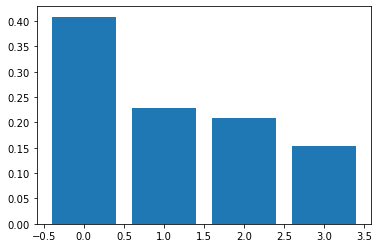

In [77]:
plt.plot()

plt.bar(np.linspace(0, 3, 4), val_pc)

plt.show()

### Seleccionar el Número de Componentes Principales 

Un método para seleccionar el número de Componentes Principales es el método de Káiser. Para esto se seleccionan los componentes que tienen un eigenvalue > 1. Este valor indica que el Componente Principal i representa más varianza que una de las variables originales. Este método sólo se puede llevar a cabo cuando los datos están estandarizados. 

Para hacer estos calculos necesitamos obtener los eigenvalues.

In [78]:
eigen_values, eigen_vectors = np.linalg.eig(X_tr_corr)

eigen_values[:4]

array([1.63457295, 0.61324103, 0.91549911, 0.83668691])

En este caso, tenemos que únicamente el primer componente principal tiene un valor de eigenvalue > 1 y también con el método del codo, vemos que el codo se produce con un único componente.

In [79]:
# selecciono el 1er componente

# 14 componentes principales

pc1 = Vt.T[:, 0:1]
pc1

array([[-0.60384652],
       [-0.42011922],
       [ 0.50948299],
       [-0.44642615]])

Una vez he seleccionado un único componente principal, 
voy a transformar la matriz orignal. Para hacerlo, voy a multiplicarla por el vector principal 1.

Para eso, es necesario que el número de columnas de la matrix de los datos originales sea igual al número de filas del vector.

Con la función shape, podemos ver si esta asunción se cumple y realizar la operación.

In [80]:
pc1.shape

(4, 1)

In [81]:
X_tr_num.shape

(920, 4)

In [82]:
# se cumple la asunción y reducimos la base de datos original

dat_red = X_tr_num.dot(pc1)
X_tr_num.head()

,age,trestbps,thalch,oldpeak
0,1.006838,0.697662,0.495429,1.367365
1,1.431255,1.510939,-1.175316,0.611256
2,1.431255,-0.657801,-0.339943,1.650906
3,-1.751875,-0.115616,1.967275,2.501529
4,-1.327458,-0.115616,1.370581,0.516743


Por último, agrego el dataset de datos categóricos y ya habremos acabado de preparar los datos de entrenamiento.

In [83]:
X_train_data = pd.concat([X_tr_num, X_tr.iloc[:,4:]], axis=1)
X_train_data.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,...,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,False,True
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


In [84]:
X = X_train_data

X.shape

(920, 21)

In [85]:
y.shape

(920,)

Para generar un test set lo más realista posible, voy a utilizar las funciones del train set y las voy a aplicar en el test set.

Una vez el test set esté preprocesado, empezaré el proceso de modelado de datos. 

## Separación de los datos en un DataSet de entrenamiento y Test

In [86]:
X.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,...,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,False,True
0,1.006838,0.697662,0.495429,1.367365,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
1,1.431255,1.510939,-1.175316,0.611256,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1.431255,-0.657801,-0.339943,1.650906,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
3,-1.751875,-0.115616,1.967275,2.501529,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,-1.327458,-0.115616,1.370581,0.516743,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)


## Aplicación de Modelos No Supervisados a los Datos

In [88]:
X_train_data = X_train
X_train_data.shape

(736, 21)

Aunque nos encontramos ante un problema de aprendizaje supervisado (predecir si a partir de unos atributos una persona va a presentar la enfermedad), puedo crear una categoria nueva a partir de las variables anteriores y ver si los algoritmos no supervisados son capaces de llegar a un resultado similar al del diagnóstico del personal médico sin utilizar etiquetas.

Para obtener el valor ideal de Clústers, voy a probar diferentes valores de K y ver cómo evoluciona la inertia:

In [89]:
from sklearn import cluster

def kmeans_sse(k:int, X):
    random.seed(42)

    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    return kmeans.inertia_



def plot_sse(X):
    K_vals = np.linspace(1,10,10).astype(int)
    sse_values =[]

    for ki in K_vals:
        sse_score = kmeans_sse(ki, X)

        sse_values.append(sse_score)

    return plt.plot(K_vals, sse_values)

c:\Users\Angel\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


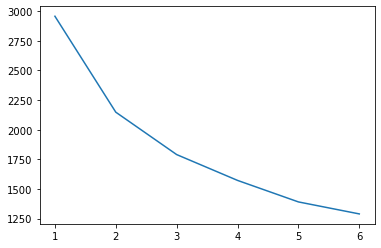

In [90]:
K_vals = np.linspace(1,6,6).astype(int)

sse_values =[]

for ki in K_vals:
    sse_score = kmeans_sse(ki, X_train_data.iloc[:,:4])

    sse_values.append(sse_score)

plt.plot(K_vals, sse_values)


La regla del codo nos dice que en el punto en el que se produce un codo es el número para escoger de k. En este caso, parece que se produce un codo en k=2. Por esta razón, voy a utilizar k=2 para dividir los datos de los clústers anteriores.

In [91]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42).fit(X_train_data.iloc[:,:4])

diagn_labels = kmeans.labels_

confusion_matrix(y_train, diagn_labels)

array([[102, 227],
       [285, 122]], dtype=int64)

A partir de la matriz de confusión se puede ver cómo el rendimiento del algoritmo de KMeans para este problema no está funcionando correctamente, y los dos clústers que ha formado tienen poco que ver con la presencia o ausencia de la enfermedad como se puede ver en la matriz de confusión. La diagonal principal se corresponde con las instancias clasificadas correctamente y se puede ver cómo la mayoría está fallando en la clasificación.

Por otro lado, tiene sentido el resultado porque no hay clústers en los datos. Es decir, la combinación de dos o varias varaibles no genera dos grupos diferenciados a una distancia y separables porque se encuentran a suficiente distancia unos clústers de otros. Como se puede ver en la siguiente figura, los datos cuantitivos forman un único clúster no separable.

<AxesSubplot:xlabel='age', ylabel='thalch'>

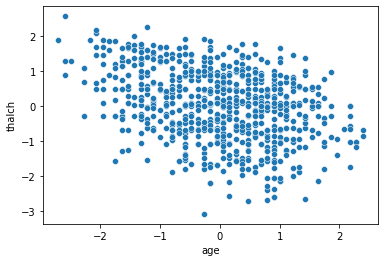

In [92]:
sns.scatterplot(data=X_train_data, x='age', y='thalch')

### KMEANS con métricas de distancia distintas

### Modelos No Supervisados DBSCAN y OPTICS

El siguiente modelo no supervisado es DBSCAN, que aunque no permite separar los datos porque no existen dos clusters separables a partir de estos datos, se puede emplear para detectar si hay outliers en los datos cuantitativos. 

c:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='age', ylabel='thalch'>

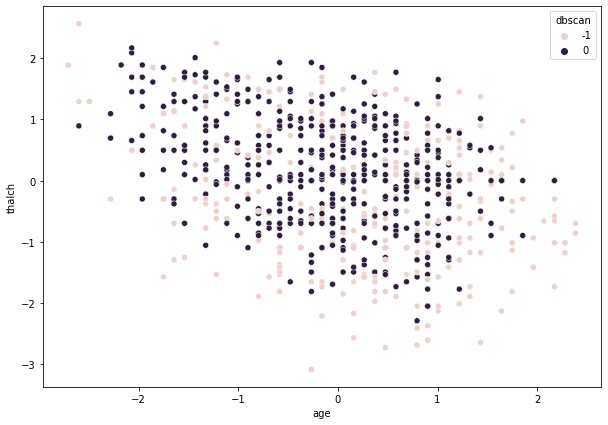

In [93]:
clustering = cluster.DBSCAN(eps=0.8, min_samples=15).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['dbscan'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='dbscan')

c:\Users\Angel\Anaconda3\lib\site-packages\sklearn\cluster\_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='age', ylabel='thalch'>

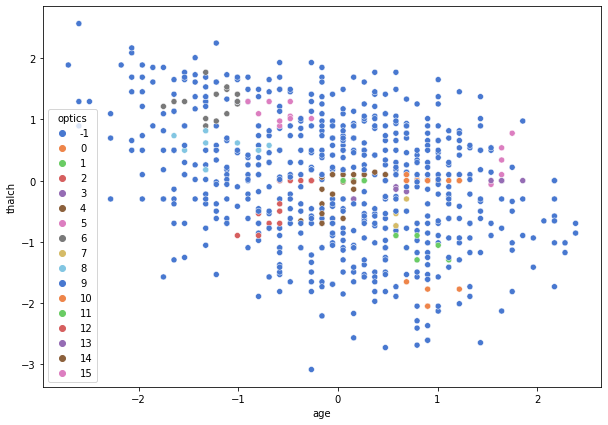

In [94]:
clustering = cluster.OPTICS(min_samples=5).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['optics'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='optics', palette='muted')

Una de las ventajas de OPTICS es que no es necesario configurar el valor de epsilon. En este problema es un valor que sí que parece necesario y el rendimiento del algoritmo está siendo inferior a DBSCAN. Por otro lado, estoy forzando a usar OPTICS en esta base de datos cuando no es un problema prototípico de clusterización y es esperable que el renidimiento del algoritmo no sea el más óptimo.

En este caso, como muestro a continuación valores distintos de eps no cambian mucho el resultado final del algoritmo. En el sentido de que la mayoría de los datos siguen no pertenciendo a ninguna categoría.

c:\Users\Angel\Anaconda3\lib\site-packages\sklearn\cluster\_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='age', ylabel='thalch'>

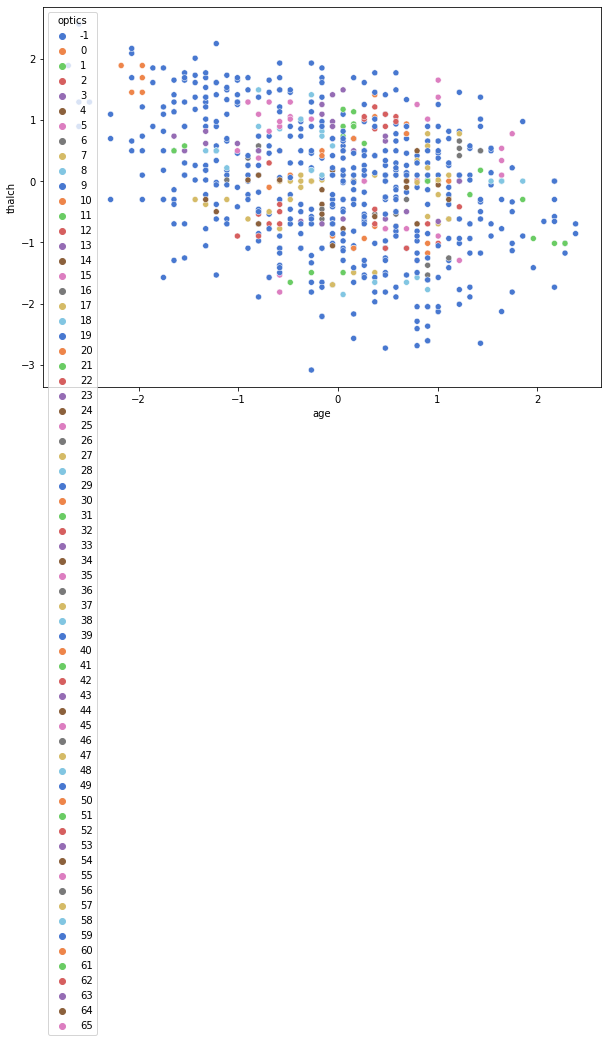

In [95]:
clustering = cluster.OPTICS(min_samples=3).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['optics'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='optics', palette='muted')

c:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='age', ylabel='thalch'>

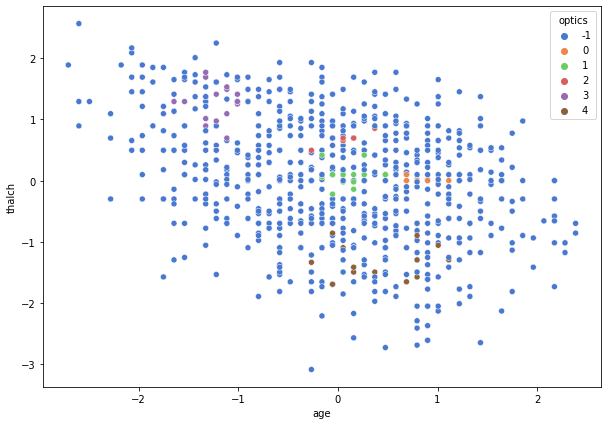

In [96]:
clustering = cluster.OPTICS(min_samples=8).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['optics'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='optics', palette='muted')

En este caso, a diferencia del modelo generado con KMeans, no tiene  mucho sentido estimar la calidad del modelo, porque el funcionamiento de estos modelos no está siendo el apropiado. Principalmente, porque la base de datos no es la más apropiada para encontrar clústers. De manera que lo estamos empleando para encontrar posibles outilers.

En definitiva, vemos como con valores muy bajos de eps hay muchos clústers, pero con valores más altos se va haciendo muy difícil que los datos pertenezcan a una categoría y la mayoría quedan como outliers no pertenecientes a ningún cluster.

Aún así, vuelvo a decir que estos datos no son los más apropiados ni en los que mejor va a funcionar este algoritmo. Estos algoritmos están pensados para otro tipo de datos, como en los del siguiente ejemplo: https://scikit-learn.org/stable/modules/clustering.html

Este tipo de algoritmos son muy útiles. DBSCAN/OPTICS nos pueden ayudar a identificar zonas con alta densidad de datos. Esto lo podemos usar para identificar grupos distintos, pero incluso puede ser útil en otro tipo de situaciones. Por ejemplo, para estimar el lugar en el que ocurren más accidentes de tráfico en una ciudad o para estimar las zonas en las que se van a producir más contagios de una enfermedad porque hay una gran densidad de tráfico de peatones. 

## Modelos Supervisados
### Árbol de Decisión

El primer modelo supervisado que voy a entrenar va a ser un árbol de decisión. Para hacer esto, voy a utilizar el método de búsqueda por rejilla para encontrar valores más apropiados de profundidad del árbol y entrenar un mejor modelo.

In [115]:
X_train_data = X_train_data.drop(columns=['dbscan', 'optics'])

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':list(np.linspace(4, 15, 6).astype(int)),
              'min_samples_split':[2, 10, 20, 30, 50, 100]}

dtc = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtc,param_grid, cv=4)

grid.fit(X_train_data, y_train)

grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

Para extraer las reglas que está seguiendo el árbol de scikit learn es necesaria la función export_tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [117]:
type(X_train_data.columns.tolist())

list

In [120]:
from sklearn.tree import export_text
dtc = DecisionTreeClassifier(max_depth=2, min_samples_split=20)
dtc.fit(X_train_data, y_train)

print(export_text(dtc, feature_names=X_train_data.columns.tolist()))

|--- cp_asymptomatic <= 0.50
|   |--- exang_False <= 0.50
|   |   |--- class: 1
|   |--- exang_False >  0.50
|   |   |--- class: 0
|--- cp_asymptomatic >  0.50
|   |--- oldpeak <= 0.37
|   |   |--- class: 1
|   |--- oldpeak >  0.37
|   |   |--- class: 1



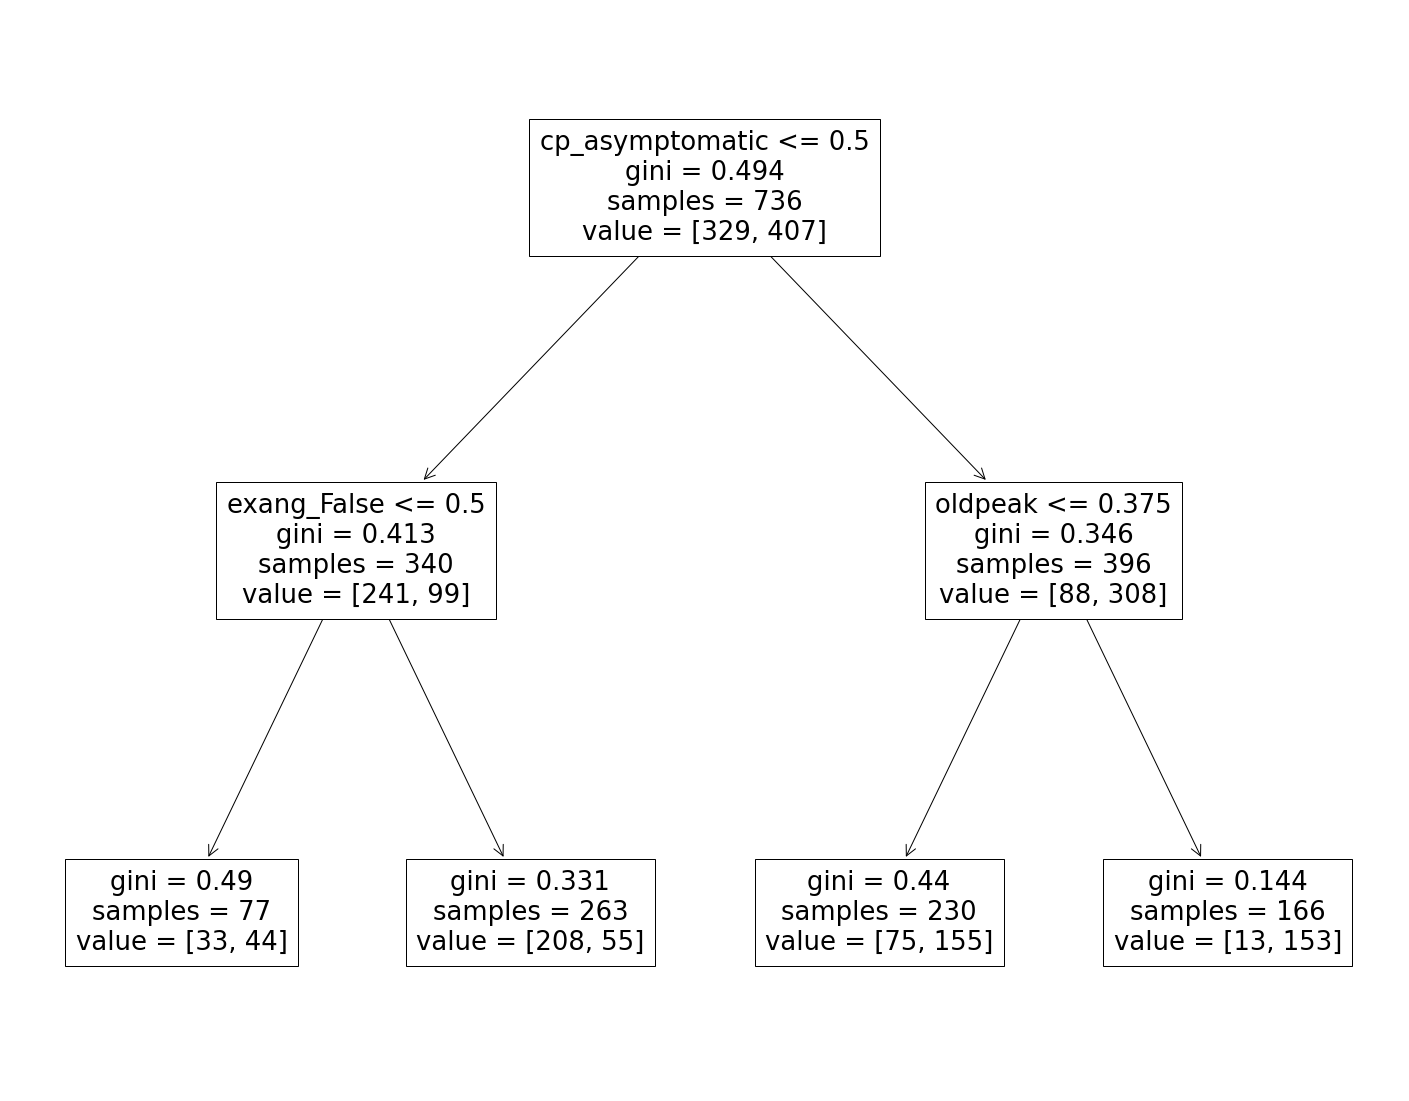

In [121]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
myplot = plot_tree(dtc, 
                   feature_names=X_train_data.columns.tolist())

En este caso, tenemos un modelo sencillo para explicar cómo funcionan las reglas de un árbol de decisión en general. 

La primera regla nos dice que si el valor de las variables cp_asymptomatic y exang_False es menor o igual a 0.5, la instancia será clasificada como de la primera clase (con presencia de la enfermedad).

La segunda clase, que si exang_False es mayor que 0.5, la clase será de la clase 0 (o ausencia de la enfermedad).

En cambio, cuando los pacientes tengan un diagnóstico superior a 0.5 en la variable cp_asymptomatic y un valor de oldpeak inferior o igual a 0.36, serán diagnosticados como que tienen la enfermedad (clase 1).  

Por último, cuando los pacientes tengan un diagnóstico superior a 0.5 en la variable cp_asymptomatic y un valor de oldpeak superior a 0.36, serán diagnosticados como que no están enfermos (clase 0).  

In [122]:
y_train_pred = cross_val_predict(dtc, X_train_data, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[215, 114],
       [ 75, 332]], dtype=int64)

In [124]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_split=2)
dtc.fit(X_train_data, y_train)

y_train_pred = cross_val_predict(dtc, X_train_data, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[238,  91],
       [ 76, 331]], dtype=int64)

In [125]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")


La precisión del modelo es de 0.7843601895734598, la sensibilidad de 0.8132678132678133 y la especifícidad de 0.723404255319149


Los datos de la precisión del modelo son bastante buenos y nos indican que el modelo clasifica bien las instancias cerca del 80% de las veces, un 78,96%* de las veces clasifica las instancias correctamente.

Por otro lado, la sensibilidad y la especificidad son parecidas. Estos valores nos indican que habrá alrededor de un 25% de las personas con la enfermedad que no serán diagnosticadas. El mismo valor para las personas sin enfermedad que serán diagnosticadas con la enfermedad que serán falsamente diagnosticadas.

*este dato puede variar puesto que no se está usando un seed

Además, el modelo de árbol de decisión es uno de los modelos más faciles de interpretar. Esto es así porque se basa en reglas lógicas. Es decir, para una persona será fácil entender este modelo porque simplemente tendrá que ser capaz de leer esas instrucciones. Al final, un árbol de decisión se basa en seguir estas reglas para llegar a una conclusión. Por ejemplo, si la puntuación de un atributo m es menor (o mayor) a un valor x, se seguirá a la siguiente rama del árbol. Así hasta que al final se asigna una de las categorías.

Este modelo, es especialmente útil si hay que entrenar a personas para que concedan o no un préstamo. Empezarían haciendo una primera pregunta y en base a las diferentes respuestas, irán bajando hasta que decidir si dar o no dicho préstamo.

El rendimiento del modelo no es malo. Pese a ello, un modelo con una precisión menor al 80% y con una sensibilidad similar al 75% puede ser no suficientemente bueno para implementarlo en una situación hospitalaria real porque el riesgo de no diagnosticar a una persona con la enfermedad es demasiado alto.

In [126]:
dtc = DecisionTreeClassifier(max_depth=8, min_samples_split=20)

dtc.fit(X_train_data, y_train)

tree_predictions = dtc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, tree_predictions).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.7685185185185185, la sensibilidad de 0.8137254901960784 y la especifícidad de 0.6951219512195121


Los resultados de la predicción en los datos de test, muestran que el aprendiaje ha sido bueno y que ante nuevos datos el rendimiento del modelo se mantiene similar. La precisión baja del 78% al 76%. De manera que le overfitting del modelo es baja y la capacidad para predecir nuevos datos es buena.

## Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth':list(np.linspace(4, 15, 6).astype(int)),
              'n_estimators':[2, 10, 30, 50, 100, 150, 300]}

rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rfc, param_grid, cv=4)

grid.fit(X_train_data, y_train)

grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

Mediante un proceso parecido al anterior, podemos probar la mejor combinación de parámetros para encontrar el mejor random forest. En este caso, n_estimators se corresponde con el número de árboles que van a formar el ensamblaje de random forest y max_septh, la máxima profundidad de los árboles.

In [105]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=42)

rfc.fit(X_train_data, y_train)

y_train_pred = cross_val_predict(dtc, X_train_data, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[246,  83],
       [102, 305]], dtype=int64)

In [106]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.7860824742268041, la sensibilidad de 0.7493857493857494 y la especifícidad de 0.7477203647416414


En la mayoría de situaciones, usar un random forest mejora el rendimiento del modelo. En este caso, no parece que el rendimiento esté siendo mucho mejor.

Una de las razones por las que el modelo no está mejorando suficientemente es porque puede haber variables que no sean útiles para predecir este diagnóstico.

Random Forest contiene una feature que permite encontrar las características que se están empleando más y que son más relevantes para crear estos modelos.

Esto nos permite ver si el modelo no está mejorando porque contiene muchos atributos  poco relevantes.

In [107]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=42)

rfc.fit(X_train_data, y_train)

rfc.feature_importances_

array([0.07209081, 0.0424113 , 0.13752411, 0.10521224, 0.15169895,
       0.10540384, 0.01961673, 0.00980198, 0.03446422, 0.03408613,
       0.0055683 , 0.01641951, 0.01257692, 0.0073301 , 0.00894603,
       0.01106573, 0.08668967, 0.08065413, 0.00547546, 0.00941961,
       0.00963638, 0.02554597, 0.00836185])

In [108]:
list(np.linspace(2, 20, 10).astype(int))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [109]:
param_grid = {'max_features':list(np.linspace(2, 20, 10).astype(int))}

rfc = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=42)
grid = GridSearchCV(rfc, param_grid, cv=4)

grid.fit(X_train_data, y_train)

grid.best_params_

{'max_features': 4}

In [110]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=100, max_features=4, random_state=42)

rfc.fit(X_train_data, y_train)

y_train_pred = cross_val_predict(dtc, X_train_data, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[245,  84],
       [102, 305]], dtype=int64)

In [127]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=100, max_features=4, random_state=42)

rfc.fit(X_train_data, y_train)

tree_predictions = rfc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, tree_predictions).ravel()

prec = tp/(tp + fp)

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(f"La precisión del modelo es de {prec}, la sensibilidad de {sens} y la especifícidad de {spec}")

La precisión del modelo es de 0.822429906542056, la sensibilidad de 0.8627450980392157 y la especifícidad de 0.7682926829268293


El modelo de Random forest ha generalizado mejor y ha mostrado una precisión mejor que el árbol de decisión en los datos de test, con los que no se había entrenado el modelo. El modelo de random forest no está sufriendo de overfitting y los resultados son incluso mejores.

La precisión del modelo ha subido al 82% y la sensibilidad al 86%. Ahora, el 14% de los pacientes con la enfermedad no serán correctamente diagnosticados. En el modelo anterior, este número ascendía al 25%. Lo que supone una importante mejora respecto al modelo anterior.

## Limitaciones y Riesgos del Modelo

En este último caso, hemos visto que limitar el número de atributos máximos a utilizar tampoco mejora significativamente el rendimiento del modelo. Por lo tanto, sería necesario modificar la base de datos para contar con atributos que tengan mayor capacidad de predicción. Por otro lado, un experto en medicina con mayor conocimiento del dominio podría utilizar métodos para transformar los modelos y crear atributos nuevos. Por ejemplo, el Índice de Masa Corporal es un atributo creado a partir de la altura y el peso que tiene mayor capacidad predictiva que los atributos que lo forman. En el presente dataset, podrían existir atributos que están "desperdiciados" por mi falta de conocimiento experto en el ámbito. 

Como ya he comentado anteriormente, el modelo no tiene un rendimiento suficientemente bueno como para emplearse en una situación real. Aíun así, este tipo de algoritmos se podrán utilizar en un futuro como una herramienta de diagnóstico más. Probablemente, el personal sanitario del futuro contará con las herramientas necesarias para interpetar estos modelos y los utilizarán como una herramienta más de diagnóstico como hoy pueden utilizar las pruebas de imagen, analíticas de sangre...

Por último, este dataset contaba con una distribución similar de clases. Aproximadamente, el 50% de los diagnósticos eran positivos. Cuando las clases están muy desbalanceadas en los atributos a predecir, los modelos tienen dificultades para generar buenos modelos y suelen estar sesgados a atribuir a la clase más frecuente en los datos.

<AxesSubplot:>

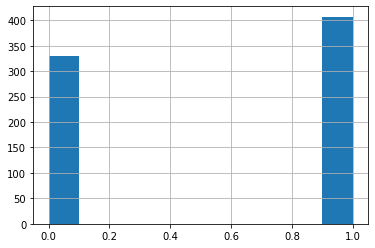

In [111]:
y_train.hist()

## Conclusiones y Aprendizajes

Con esta práctica he aprendido a realizar un proyecto de minería de datos de inicio a fin desde la extracción de la base de datos hasta el desarrollo y la interpretación del modelo de datos.

Así como a utilizar las diferentes librerías para Ciencia de Datos (en esta práctica usando Python): pandas, matplotlib, seaborn, sklearn.

También a interpretar los resultados y ponerlos en contexto. Por ejemplo, la interpretación de los resultados se puede hacer con una simple matriz de confusión. Mirando la diagonal principal podemos hacernos una idea de si el algoritmo está cometiendo más aciertos que errores. Aún así, el cálculo de la precisión nos da un valor numérico y cuantifica el rendimiento del algoritmo. Además, podemos utilizar otras métricas como la sensibilidad. En este caso es especialmente importante porque nos va a decir la cantidad de personas con la enfermedad que el algoritmo clasifica correctamente. 

Es importante ser consciente de qué métrica es relevante en el problema que estamos afrontando. Para cada tipo de problema deberemos enfocarnos en unas o en las otras. También en modelos de salud como este, hay que ser consciente de que un mal funcionamiento tendrá consecuencias muy perjudicicales en la salud de las personas. Por esto último, es necesario asegurar que la predictibilidad de los modelos es muy alta antes de sacar los modelos a producción.

Por último, utilizar modelos más complejos como el Random Forest ha facilitado encontrar el mejor modelo. Especialmente, después de probar diferentes valores en los hiperparámetros usando la búsqueda por rejilla. Esto ha facilitado encontrar el valor apropiado de estos parámetros y el hecho de utilizar cross validation y separar los datos en 4 folds ha permitido no solo mejorar los parámetros, pero asegurar que no se mejoraban a causa del overfitting y sobreentrenarse en los datos de entrenamiento.